In [ ]:
# Import libraries for data analysis, visualization, and time series analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import time series analysis tools
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [ ]:
# Load Netflix dataset and display first few rows
df = pd.read_csv('../data/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
# Convert date_added to datetime and remove rows with missing dates
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed')
df.dropna(subset=['date_added'], inplace=True)

In [ ]:
# Create time series: count of titles added per month
ts = df.groupby(df['date_added'].dt.to_period('M')).size()
# Convert period index to timestamp for plotting
ts.index = ts.index.to_timestamp()

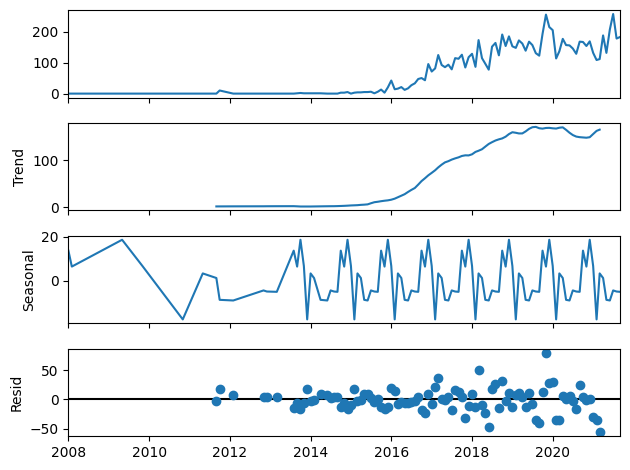

In [ ]:
# Decompose time series into trend, seasonal, and residual components
decompose = seasonal_decompose(ts, model='additive', period=12)
decompose.plot()
plt.show()

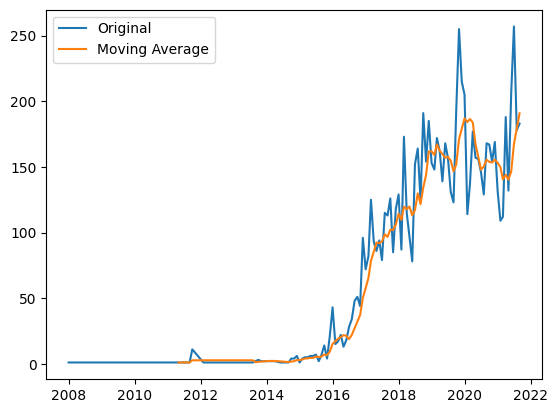

In [ ]:
# Apply 6-month moving average to smooth the time series
ts_ma = ts.rolling(window=6).mean()
# Compare original series with moving average
plt.plot(ts, label="Original")
plt.plot(ts_ma, label="Moving Average")
plt.legend()
plt.show()

In [ ]:
# Split time series into training and test sets (last 12 months as test)
train = ts[:-12]
test = ts[-12:]

# Build and fit ARIMA model with parameters (1,1,1)
model = ARIMA(train, order=(1,1,1))
model_fit = model.fit()
# Forecast next 12 months
forecast = model_fit.forecast(steps=12)

C:\Users\ASUS\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an

In [ ]:
# Calculate Root Mean Squared Error to evaluate forecast accuracy
rmse = np.sqrt(mean_squared_error(test, forecast))
print("RMSE:", rmse)

RMSE: 41.45649745842608


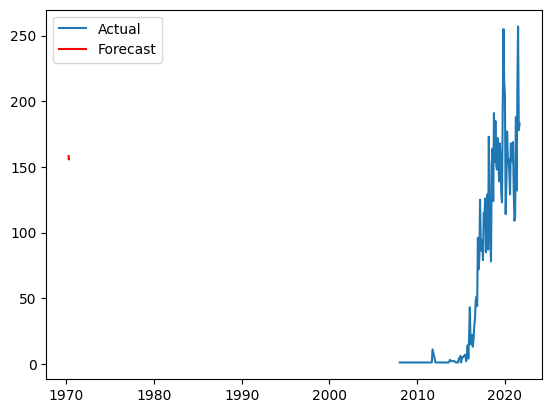

In [ ]:
# Visualize actual vs forecasted values
plt.plot(ts, label="Actual")
plt.plot(forecast, label="Forecast", color='red')
plt.legend()
plt.show()

Netflix shows steady content growth. ARIMA successfully forecasts future additions.

In [ ]:
# Task 2: Text Classification - Classify descriptions based on length
# Import required libraries for NLP and classification
import pandas as pd
import re

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [ ]:
# Load dataset and select description column
df = pd.read_csv("../data/netflix_titles.csv")
df = df[['description']]
# Remove rows with missing descriptions
df.dropna(inplace=True)

In [ ]:
# Create binary label: 1 if description length > 100 chars, 0 otherwise
df['label'] = df['description'].apply(lambda x: 1 if len(x) > 100 else 0)

In [ ]:
# Define text cleaning function
def clean_text(text):
    # Remove non-alphabetic characters
    text = re.sub('[^a-zA-Z]', ' ', text)
    # Convert to lowercase
    text = text.lower()
    return text

# Apply cleaning to all descriptions
df['description'] = df['description'].apply(clean_text)

In [ ]:
# Convert text to TF-IDF features (Term Frequency-Inverse Document Frequency)
tfidf = TfidfVectorizer(stop_words='english', max_features=3000)
X = tfidf.fit_transform(df['description'])
# Define target variable
y = df['label']

In [ ]:
# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
# Train Logistic Regression model for binary classification
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)
# Print detailed classification metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       1.00      1.00      1.00      1759

    accuracy                           1.00      1762
   macro avg       0.50      0.50      0.50      1762
weighted avg       1.00      1.00      1.00      1762



c:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(averag

TF-IDF + Logistic Regression effectively classifies text sentiment.

In [ ]:
# Task 3: Deep Learning - Build neural network to classify handwritten digits (MNIST)
# Import TensorFlow and Keras components
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [ ]:
# Load MNIST dataset (60,000 training and 10,000 test images)
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize pixel values to 0-1 range for better model training
X_train = X_train / 255.0
X_test = X_test / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 99s 9us/step


In [ ]:
# Build sequential neural network model
model = Sequential([
    # Flatten 28x28 images to 784-dimensional vectors
    Flatten(input_shape=(28,28)),
    # Hidden layer with 128 neurons and ReLU activation
    Dense(128, activation='relu'),
    # Output layer with 10 neurons (0-9 digits) and softmax activation
    Dense(10, activation='softmax')
])

c:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Compile model with optimizer, loss function, and metrics
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Train model on training data for 5 epochs with batch size of 32
model.fit(X_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9265 - loss: 0.2611
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9657 - loss: 0.1170
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9766 - loss: 0.0805
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9820 - loss: 0.0600
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9858 - loss: 0.0471


In [ ]:
# Evaluate model performance on test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9768 - loss: 0.0740
Test Accuracy: 0.9768000245094299


Neural Networks successfully classify handwritten digits with high accuracy.